In [2]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
def unzip_data(path_in, path_out):
    if not os.path.exists(path_out):
        os.makedirs(path_out)

    with zipfile.ZipFile(path_in, 'r') as zip_ref:
        zip_ref.extractall(path_out)

    print(f"File {path_in} is unpacked to {path_out}")


In [3]:
zip_file_path = '../src/data.zip'
extract_path = './extracted_data'
unzip_data(zip_file_path, extract_path)

File ../src/data.zip is unpacked to ./extracted_data


In [3]:
df = pd.read_csv('extracted_data\list_attr_celeba.csv')
df.head()
df = df[['image_id', 'Bald']]
df.head()

image_id  Bald
0  000001.jpg    -1
1  000002.jpg    -1
2  000003.jpg    -1
3  000004.jpg    -1
4  000005.jpg    -1

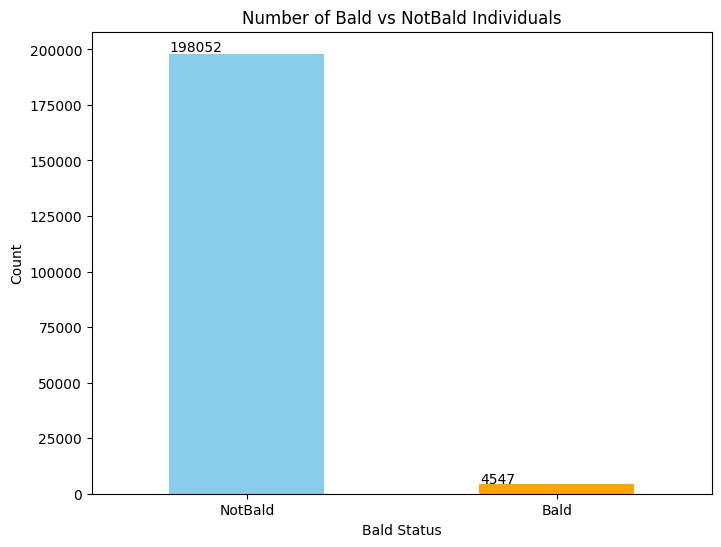

In [5]:
bald_counts = df['Bald'].value_counts()

bald_counts.index = bald_counts.index.map({1: 'Bald', -1: 'NotBald'})

plt.figure(figsize=(8, 6))
ax = bald_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Bald vs NotBald Individuals')
plt.xlabel('Bald Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

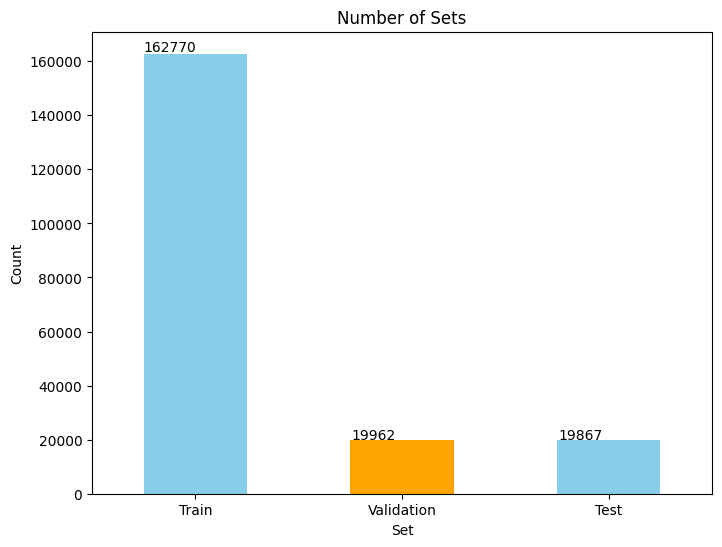

In [6]:
eval_df = pd.read_csv('extracted_data\list_eval_partition.csv')
partition_counts = eval_df['partition'].value_counts()

partition_counts.index = partition_counts.index.map({0: 'Train', 1: 'Test', 2: 'Validation'})
plt.figure(figsize=(8, 6))
ax = partition_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Sets')
plt.xlabel('Set')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [6]:
DIR_PATH = r'extracted_data\img_align_celeba\img_align_celeba'

def check_images(directory):
    empty_or_corrupted = []
    num_correct = 0

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            img = cv2.imread(file_path)

            if img is None or img.size == 0:
                empty_or_corrupted.append(filename)
            else:
                num_correct += 1
        except Exception as e:
            empty_or_corrupted.append(filename)

    return empty_or_corrupted, len(empty_or_corrupted), num_correct


corrupted_files, num_corrupted, num_correct = check_images(DIR_PATH)

In [7]:
if num_correct > 0:
    print(f"Found {num_correct} files.")
else:
    print("Not found correct files.")

if num_corrupted > 0:
    print(f"Found {num_corrupted} files:")
    for file in corrupted_files:
        print(file)
else:
    print("No empty or corrupted files found.")

Found 202599 files.
No empty or corrupted files found.


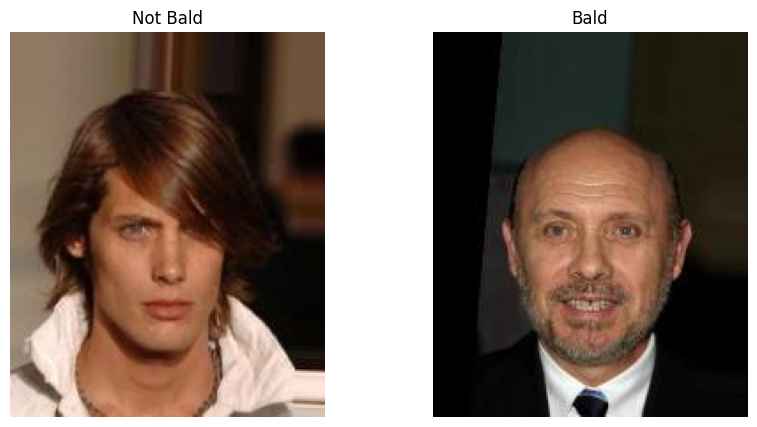

In [16]:
def display_sample_images(df):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    labels = {-1: 'Not Bald', 1: 'Bald'}

    for i, label in enumerate(labels):
        image = df[df['Bald'] == label]
        sample_image = image.sample()
        image_id = sample_image['image_id'].values[0]
        img_path = os.path.join(DIR_PATH, image_id)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img_rgb)
        axes[i].axis('off')
        axes[i].set_title(labels[label])

    plt.show()


display_sample_images(df)